In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

%matplotlib inline

# Partie 1: Régression

## 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [2]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]

df = pd.read_csv('textfiles/MROZ.raw', sep='\s+', names=names)

In [3]:
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [25]:
print('Number of rows before:', df.shape[0])

dec_cols = ['wage', 'huswage', 'lwage']
for c in dec_cols:
    df[c] = [0. if w=='.' else float(w) for w in df[c]]

df_pos = df[df.wage > 0.]
print('Number of rows after keeping only positive wages:', 
      df_pos.shape[0])

Number of rows before: 753
Number of rows after keeping only positive wages: 428


## 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation  pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieur à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

In [5]:
df.wage.describe()

count    753.000000
mean       2.374565
std        3.241829
min        0.000000
25%        0.000000
50%        1.625000
75%        3.787900
max       25.000000
Name: wage, dtype: float64

In [6]:
df.age.describe()

count    753.000000
mean      42.537849
std        8.072574
min       30.000000
25%       36.000000
50%       43.000000
75%       49.000000
max       60.000000
Name: age, dtype: float64

In [7]:
df.educ.describe()

count    753.000000
mean      12.286853
std        2.280246
min        5.000000
25%       12.000000
50%       12.000000
75%       13.000000
max       17.000000
Name: educ, dtype: float64

In [8]:
median_huswage = df_pos.huswage.median()
df_wage_gt_median = df_pos[df_pos['huswage'] > median_huswage]

In [9]:
df_wage_gt_median.wage.describe()

count    214.000000
mean       4.896822
std        4.041606
min        0.161600
25%        2.513850
50%        3.846400
75%        5.854125
max       25.000000
Name: wage, dtype: float64

In [10]:
df_wage_gt_median.age.describe()

count    214.000000
mean      42.275701
std        7.388843
min       30.000000
25%       36.000000
50%       43.000000
75%       48.000000
max       59.000000
Name: age, dtype: float64

In [11]:
df_wage_gt_median.educ.describe()

count    214.000000
mean      13.242991
std        2.359045
min        5.000000
25%       12.000000
50%       12.000000
75%       16.000000
max       17.000000
Name: educ, dtype: float64

In [12]:
df_wage_lt_median = df_pos[df_pos['huswage'] <= median_huswage]
df_wage_lt_median.wage.describe()

count    214.000000
mean       3.458541
std        2.143274
min        0.128200
25%        2.117275
50%        2.971800
75%        4.393800
max       18.267000
Name: wage, dtype: float64

In [13]:
df_wage_lt_median.age.describe()

count    214.000000
mean      41.668224
std        8.045482
min       30.000000
25%       35.000000
50%       41.000000
75%       47.000000
max       60.000000
Name: age, dtype: float64

In [14]:
df_wage_lt_median.educ.describe()

count    214.000000
mean      12.074766
std        2.054200
min        6.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       17.000000
Name: educ, dtype: float64

## 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

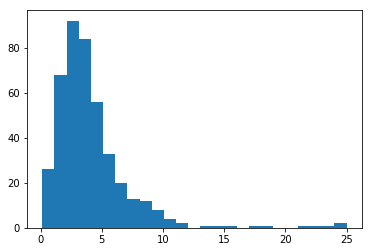

In [15]:
plt.hist(df_pos.wage, bins=25)
pass

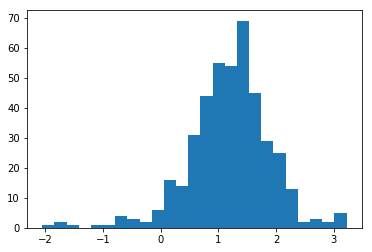

In [16]:
plt.hist(np.log(df_pos.wage), bins=25)
pass

## 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [17]:
corr_motheduc_fatheduc = np.corrcoef(df_pos.motheduc, df_pos.fatheduc)[1,0]
print('Corrélation entre motheduc et fatheduc:', corr_motheduc_fatheduc)

Corrélation entre motheduc et fatheduc: 0.554063218431


## 5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

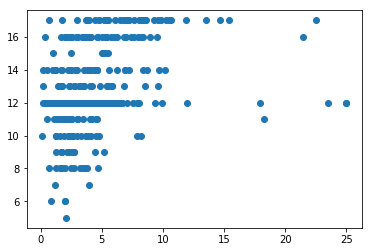

In [18]:
plt.scatter(df_pos.wage, df_pos.educ)
pass

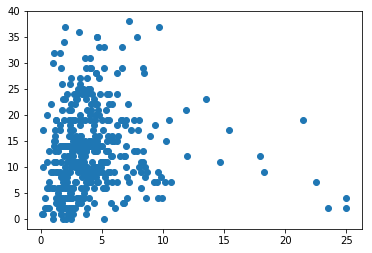

In [19]:
plt.scatter(df_pos.wage, df_pos.exper)
pass

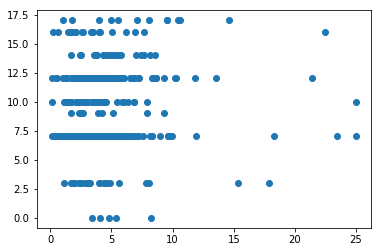

In [20]:
plt.scatter(df_pos.wage, df_pos.fatheduc)
pass

## 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise

## 7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsge6. Commentez l'histogramme des résidus. 

In [21]:
lr_wage = LinearRegression()
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsge6']
lr_wage.fit(df_pos[cols], df_pos.wage)
residuals = df_pos.wage - lr_wage.predict(df_pos[cols])

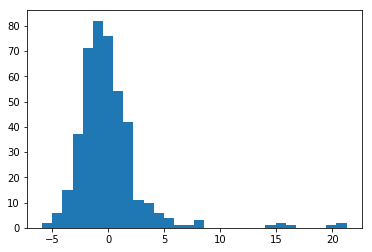

In [22]:
plt.hist(residuals, bins=30)
pass

## 8. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsge6. Comparer l’histogramme obtenu à celui de la question 7.

In [26]:
lr_lwage = LinearRegression()
lr_lwage.fit(df_pos[cols], df_pos.lwage)
residuals = df_pos.lwage - lr_lwage.predict(df_pos[cols])

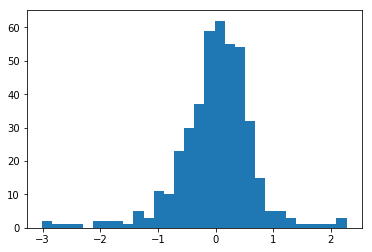

In [27]:
plt.hist(residuals, bins=30)
pass

## 9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values. 

## 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

## 11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

## 12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

En 10 ans, le salaire augmente en moyenne de 22.60%


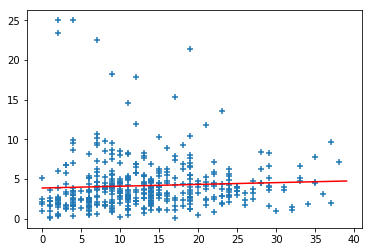

In [28]:
lr = LinearRegression()
lr.fit(df_pos[['exper']], df_pos.wage)
percentage = lr.coef_[0] * 100.
print('En 10 ans, le salaire augmente en moyenne de {:.2f}%'.format(percentage * 10))

plt.scatter(df_pos.exper, df_pos.wage, marker='+')

r = list(range(40))
plt.plot(r, [lr.predict(x) for x in r], c='r')
pass

## 13. Tester l’égalité des coefficients associés aux variables kidsge6 et kidslt6. Interprétez.

In [33]:
coef_kidsge6 = lr_lwage.coef_[cols.index('kidsge6')]
coef_kidslt6 = lr_lwage.coef_[cols.index('kidslt6')]

if coef_kidsge6 == coef_kidslt6:
    print('Les coefficients associés aux variables kidsge6 et kidslt6 sont égaux')
else:
    abs_diff = abs((coef_kidsge6 - coef_kidslt6) / coef_kidslt6)
    print('Les coefficients associés aux variables kidsge6 et kidslt6 sont différents')
    print('{:.4f} != {:.4f} (différents à {:.2f}%)'.format(coef_kidsge6, coef_kidslt6, abs_diff*100))

Les coefficients associés aux variables kidsge6 et kidslt6 sont différents
-0.0117 != -0.0453 (différents à 74.17%)


## 14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

## 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Refaire le test avec 3 groupes (mutuellement exclusifs) : les femmes de moins de 30 ans, entre 30 et 43 ans, plus de 43 ans.

## 16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires.

## 17. Créer une variable binaire pour les femmes qui ont des enfants de moins de 2 ans. Créer un terme d’interaction entre le nombre d’enfants de moins deux ans et l’éducation. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc,  et ces deux dernières variables. Faire le test de significativité du terme d’interaction. Interpréter.

# Partie 2: Séries temporelles 1

## 1. Ouvrir le fichier volat.raw; importer les données sur matlab en recodant les valeurs manquantes en -9999.

## 2. Pourquoi doit-on stationnariser les séries ?

## 3. Faire le test de racine unitaire de log(sp500), de pcsp de div

## 4. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de pcsp et de div. Quelle est la différence entre ces deux graphiques ?

## 5. Proposer une modélisation AR(p) d’une série de votre choix, en utilisant tous les outils vus au cours.

## 6. Faire des prévisions pour T+1, T+2, T+3 en utilisant le modèle AR(p) de question 5. Calculer les RMSE.

# Partie 3: Séries temporelles 2

## 1. Ouvrir le fichier intdef.raw. Faire une régression de i3 sur inf_1, inf_2, inf_3 et def_1, def_2, def_3 où x_i représente la variable x laggée de i périodes. Calculer l’impact à 1, 2 et 3 périodes de inf et def sur i3. Calculer les impacts à long terme ; commentez

## 2. Tester l’auto-corrélation des erreurs

## 3. Tester l’hypothèse que les valeurs passées de inf n’ont pas d’impact sur i3.